#Thông tin sinh viên:

Họ tên: Huỳnh Võ Ngọc Thanh

MSSV: 21520449

#Bài 1: Sử dụng Numpy xây dựng phương pháp hồi quy tuyến tính và tiến hành huấn luyện trên bộ dữ liệu California House Price

In [1139]:
import numpy as np
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

#Loading data:

In [1140]:
data = pd.read_csv("/content/drive/MyDrive/DS102 TH/Lab3/housing.csv")

In [1141]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [1142]:
data.shape

(20640, 10)

#Preprocessing:

In [1143]:
data.isna().sum(axis="index")

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [1144]:
data = data.dropna()

In [1145]:
data.duplicated().any()

False

In [1146]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [1147]:
X = data.iloc[:, :-2]
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462


In [1148]:
y = data.iloc[:,-2]
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

#Trực quan hóa dữ liệu đầu vào:

gồm 8 đặc trưng

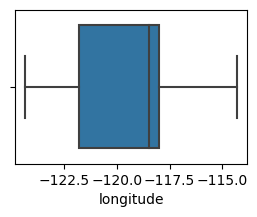

In [1149]:
plt.figure(figsize=(3, 2))
sbn.boxplot(x=data['longitude'])
plt.show()

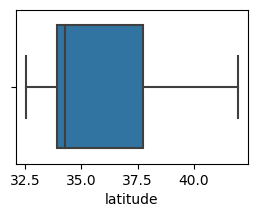

In [1150]:
plt.figure(figsize=(3, 2))
sbn.boxplot(x=data['latitude'])
plt.show()

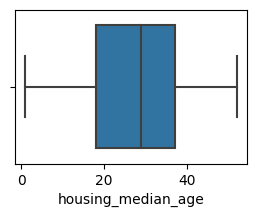

In [1151]:
plt.figure(figsize=(3, 2))
sbn.boxplot(x=data['housing_median_age'])
plt.show()

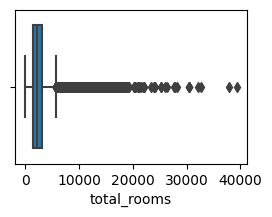

In [1152]:
plt.figure(figsize=(3, 2))
sbn.boxplot(x=data['total_rooms'])
plt.show()

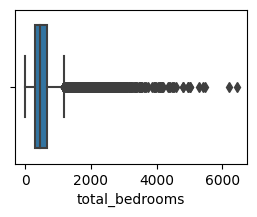

In [1153]:
plt.figure(figsize=(3, 2))
sbn.boxplot(x=data['total_bedrooms'])
plt.show()

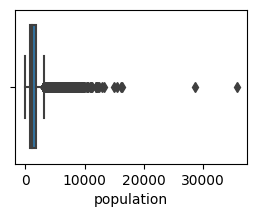

In [1154]:
plt.figure(figsize=(3, 2))
sbn.boxplot(x=data['population'])
plt.show()

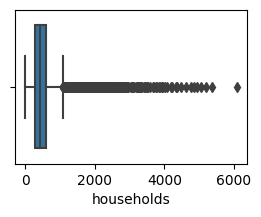

In [1155]:
plt.figure(figsize=(3, 2))
sbn.boxplot(x=data['households'])
plt.show()

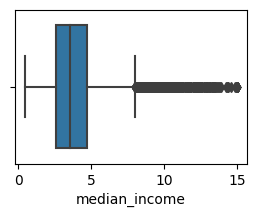

In [1156]:
plt.figure(figsize=(3, 2))
sbn.boxplot(x=data['median_income'])
plt.show()


#Vẽ ma trận tương quan:

<ipython-input-1157-e3d6e3191ed2>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sbn.heatmap(data.corr() , annot = True , cmap = "YlGnBu")


<Axes: >

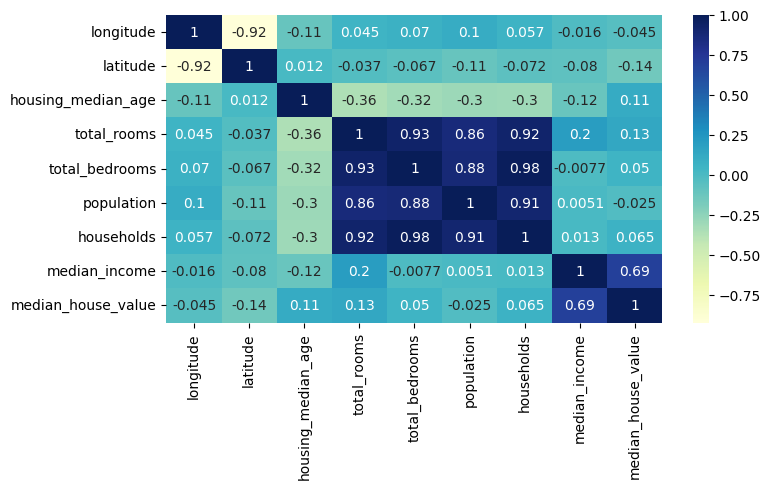

In [1157]:
plt.figure(figsize = (8,4))
sbn.heatmap(data.corr() , annot = True , cmap = "YlGnBu")

#Chia tập dữ liệu train, test:

In [1158]:
X = np.array(X)
y = np.array(y)

In [1159]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Scale dữ liệu trên tập X:

In [1160]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [1161]:
X_train

array([[0.60121457, 0.15940489, 1.        , ..., 0.01900277, 0.040625  ,
        0.72279003],
       [0.18825911, 0.565356  , 0.66666667, ..., 0.02707475, 0.08651316,
        0.43220094],
       [0.75      , 0.02763018, 0.52941176, ..., 0.0549623 , 0.11529605,
        0.13201197],
       ...,
       [0.6082996 , 0.1445271 , 0.43137255, ..., 0.03660416, 0.08075658,
        0.30882333],
       [0.34615385, 0.66206164, 0.15686275, ..., 0.02200174, 0.05575658,
        0.34559523],
       [0.31072874, 0.59829968, 0.35294118, ..., 0.02076852, 0.03667763,
        0.2477552 ]])

In [1162]:
X_test

array([[0.63461538, 0.16365569, 0.7254902 , ..., 0.03719275, 0.06480263,
        0.23599674],
       [0.59817814, 0.16259299, 0.49019608, ..., 0.03696852, 0.10921053,
        0.45982124],
       [0.24595142, 0.50053135, 0.64705882, ..., 0.02892458, 0.05970395,
        0.29598212],
       ...,
       [0.23481781, 0.47183847, 0.70588235, ..., 0.03750105, 0.10855263,
        0.11416394],
       [0.62955466, 0.17534538, 0.82352941, ..., 0.02836402, 0.05378289,
        0.16690115],
       [0.63157895, 0.17534538, 0.96078431, ..., 0.01729309, 0.03273026,
        0.62289486]])

#Xây dựng mô hình LinearRegression:

In [1163]:
class LinearRegression:
  def RMSE(self, x: np.ndarray, x_hat: np.ndarray) -> float:
    delta = x - x_hat

    return np.square(delta).mean()**0.5

  def fit(self, X: np.ndarray, y: np.ndarray) -> None:
    cov = np.matmul(X.T, X)
    inv_cov = np.linalg.inv(cov)
    self.theta_: np.ndarray = np.matmul(inv_cov, np.matmul(X.T, y))

  def predict(self, X: np.ndarray) -> np.ndarray:
    y_hat = np.matmul(self.theta_.T, X.T)

    return y_hat

#Huấn luyện mô hình:

In [1164]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

In [1165]:
linear_reg.theta_

array([  -46881.12458152,   -66411.44350181,   117839.37417788,
        -792155.6607205 ,   804458.5009545 , -1189386.62120315,
         640721.7995384 ,   717215.22341958])

In [1166]:
y_pred = linear_reg.predict(X_test)
y_pred

array([223964.81633263, 396680.69505978, 247402.02918997, ...,
       180099.13533358, 189017.86225294, 513319.98606949])

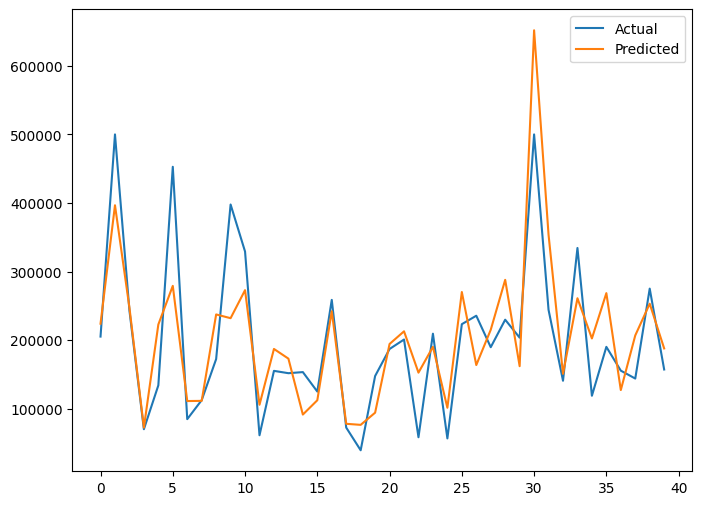

In [1167]:
df = pd.DataFrame({"y_test": y_test , "y_pred" : y_pred})
plt.figure(figsize=(8,6))
plt.plot(df[:40])
plt.legend(["Actual" , "Predicted"])

#Tính độ đo RMSE:

In [1168]:
RMSE_metric = linear_reg.RMSE(y_test, y_pred)
RMSE_metric

71906.0757516037